
# <span style="color: blue;">             ** Sleep_health_and_lifestyle_Classification**</span>


# Importing  libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score, ConfusionMatrixDisplay,precision_score,roc_auc_score,recall_score

# Read Dataset

In [2]:
df=pd.read_csv('C:/Users/dell/Documents/Downloads/Sleep_health_and_lifestyle_dataset.csv')

In [3]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


# Informtion about Dataset

In [4]:
df.shape

(316, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                316 non-null    int64  
 1   Gender                   316 non-null    object 
 2   Age                      316 non-null    int64  
 3   Occupation               316 non-null    object 
 4   Sleep Duration           316 non-null    float64
 5   Quality of Sleep         316 non-null    int64  
 6   Physical Activity Level  316 non-null    int64  
 7   Stress Level             316 non-null    int64  
 8   BMI Category             316 non-null    object 
 9   Blood Pressure           316 non-null    object 
 10  Heart Rate               316 non-null    int64  
 11  Daily Steps              316 non-null    int64  
 12  Sleep Disorder           316 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 32.2+ KB


In [6]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,163.272152,40.237342,7.023418,7.151899,60.696203,5.556962,70.518987,6890.822785
std,99.953999,7.989914,0.703611,1.116555,19.469703,1.646521,4.042978,1521.448126
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,79.750000,33.000000,6.400000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,158.500000,39.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,237.250000,44.000000,7.700000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.300000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
df["Sleep Disorder"].value_counts()

None           185
Insomnia        70
Sleep Apnea     61
Name: Sleep Disorder, dtype: int64

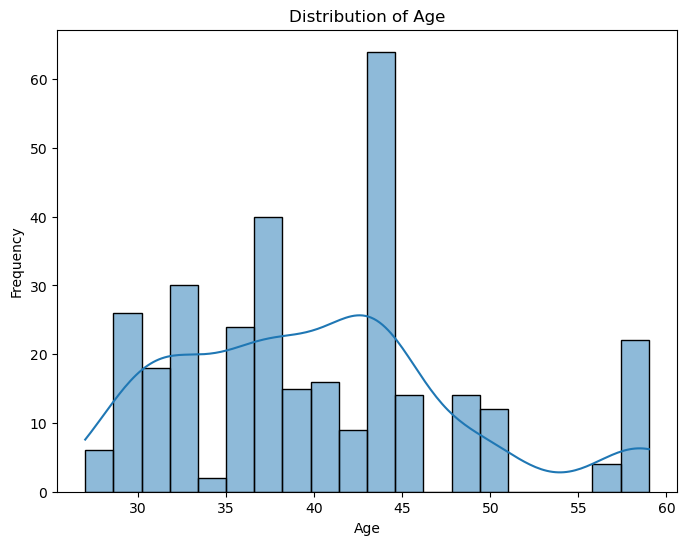

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Effect of Sleep Disorder on Sleep Duration')

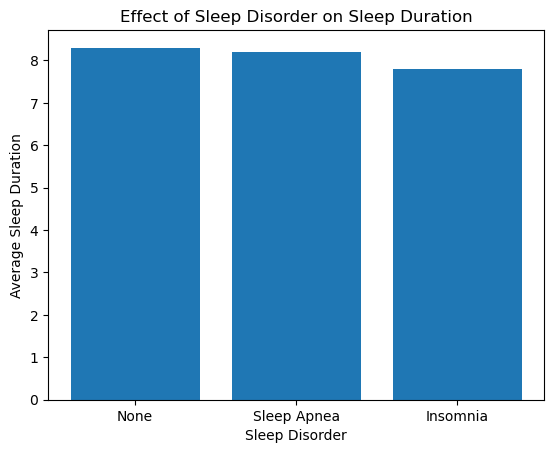

In [9]:
plt.bar(df['Sleep Disorder'],df['Sleep Duration'])
plt.xlabel("Sleep Disorder")
plt.ylabel("Average Sleep Duration")
plt.title("Effect of Sleep Disorder on Sleep Duration")

<BarContainer object of 316 artists>

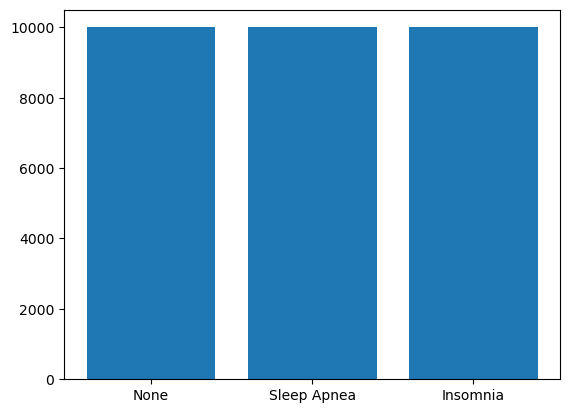

In [10]:
plt.bar(df['Sleep Disorder'],df['Daily Steps'])

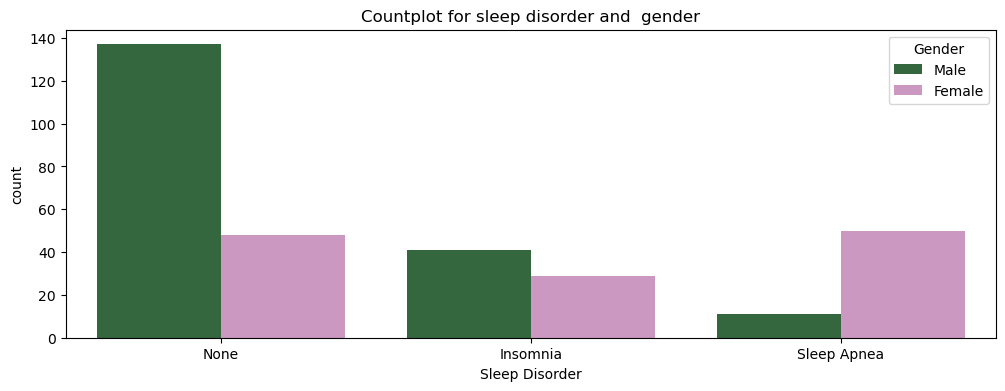

In [11]:
plt.figure(figsize=[12,4])
sns.countplot(x = df['Sleep Disorder'],hue=df['Gender'],order=df['Sleep Disorder'].value_counts().index,palette='cubehelix')
plt.title('Countplot for sleep disorder and  gender')
plt.show()

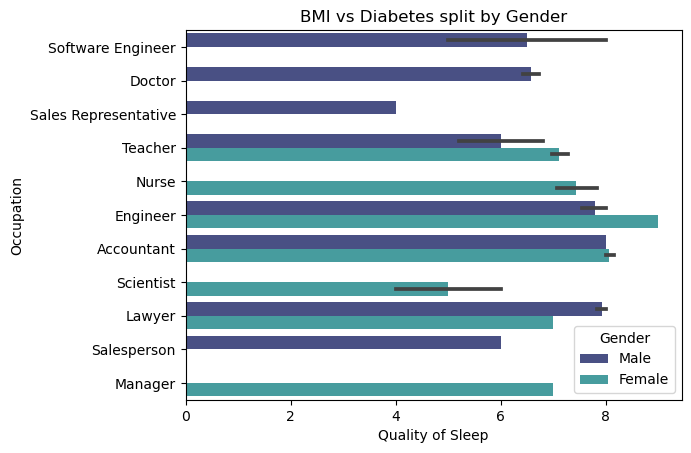

In [12]:
sns.barplot(x='Quality of Sleep', y='Occupation', hue='Gender', data=df,palette='mako')
plt.title('BMI vs Diabetes split by Gender')
plt.show()

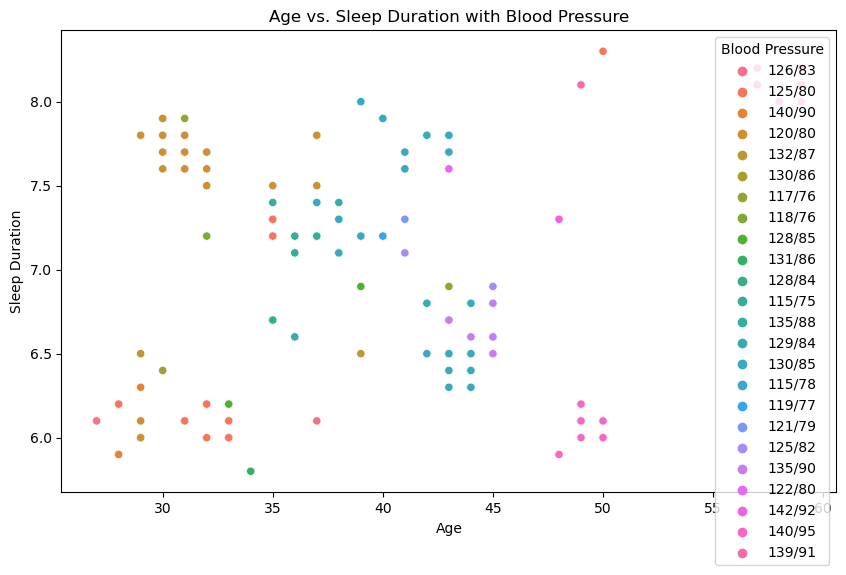

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="Sleep Duration", hue="Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Sleep Duration")
plt.title("Age vs. Sleep Duration with Blood Pressure")
plt.show()

Text(0, 0.5, 'Occupation')

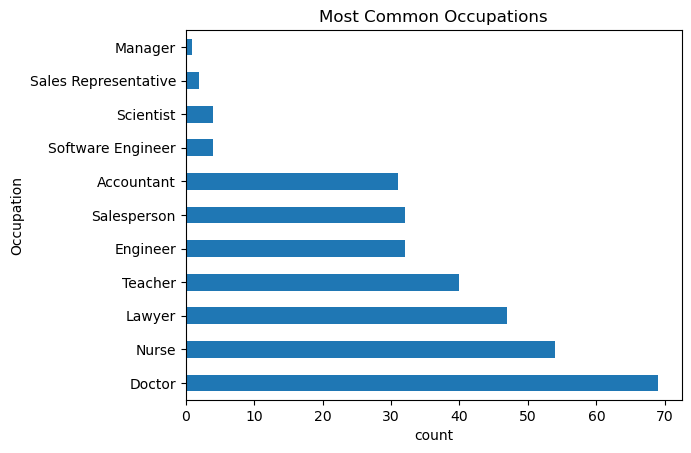

In [14]:
df['Occupation'].value_counts().plot.barh()
plt.title("Most Common Occupations")
plt.xlabel("count")
plt.ylabel("Occupation")

In [18]:
df['BMI Category'].value_counts()

Normal           164
Overweight       124
Normal Weight     18
Obese             10
Name: BMI Category, dtype: int64

In [19]:
df['BMI Category']=df['BMI Category'].replace('Normal','Normal Weight')
df['BMI Category'].value_counts()

Normal Weight    182
Overweight       124
Obese             10
Name: BMI Category, dtype: int64

<AxesSubplot:>

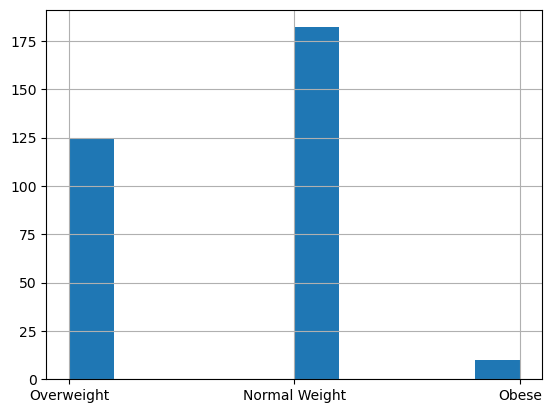

In [20]:
df["BMI Category"].hist()

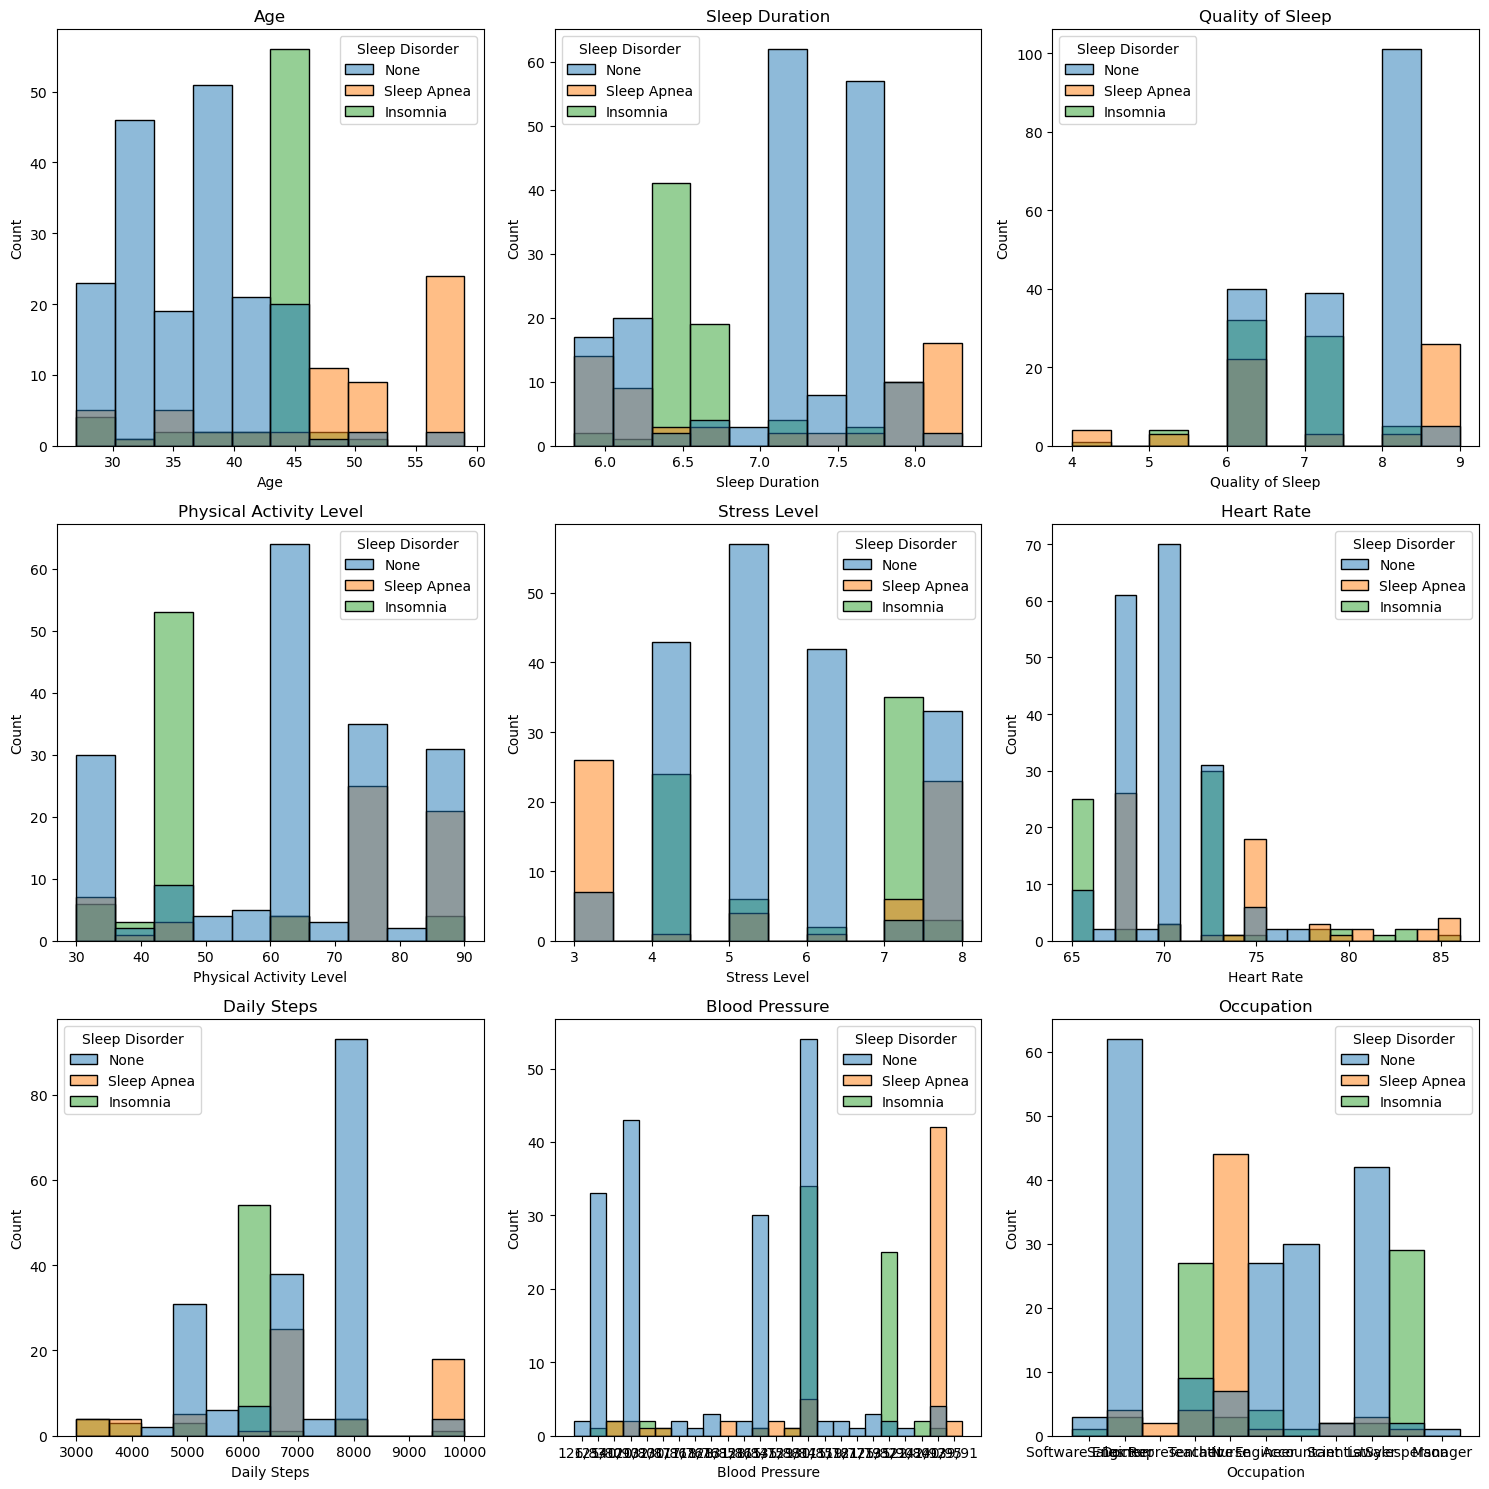

In [21]:
num_col=['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Heart Rate', 'Daily Steps', 'Blood Pressure' , 'Occupation']
fig = plt.figure(figsize=(15,15))
for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    plt.title(num_col[i])
    sns.histplot(data=df,x=df[num_col[i]],hue='Sleep Disorder')
plt.tight_layout()
plt.show()

<AxesSubplot:>

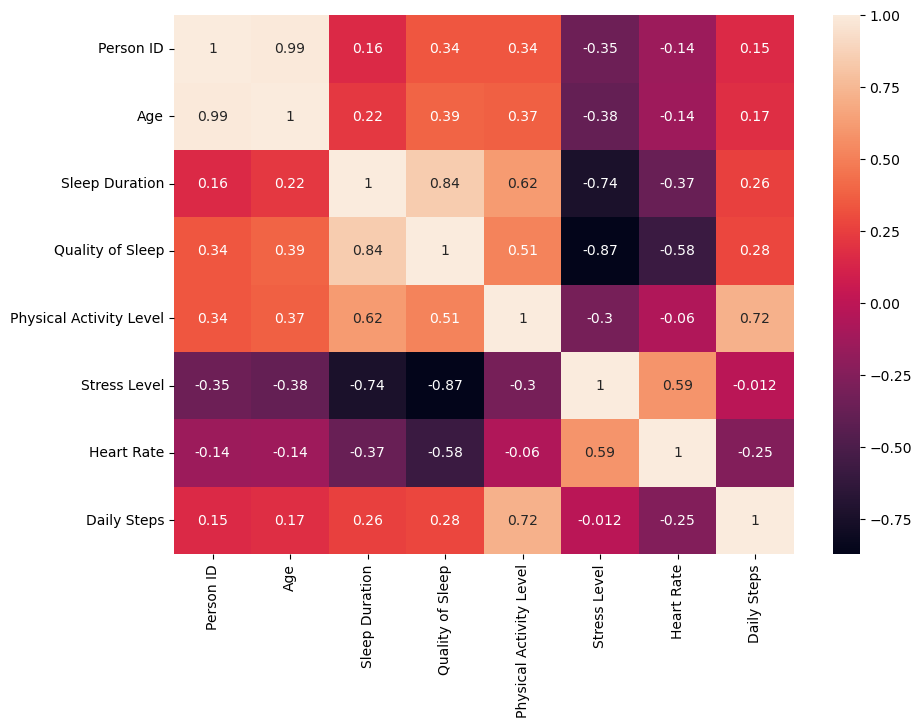

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

array([[<AxesSubplot:title={'center':'Person ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sleep Duration'}>],
       [<AxesSubplot:title={'center':'Quality of Sleep'}>,
        <AxesSubplot:title={'center':'Physical Activity Level'}>,
        <AxesSubplot:title={'center':'Stress Level'}>],
       [<AxesSubplot:title={'center':'Heart Rate'}>,
        <AxesSubplot:title={'center':'Daily Steps'}>, <AxesSubplot:>]],
      dtype=object)

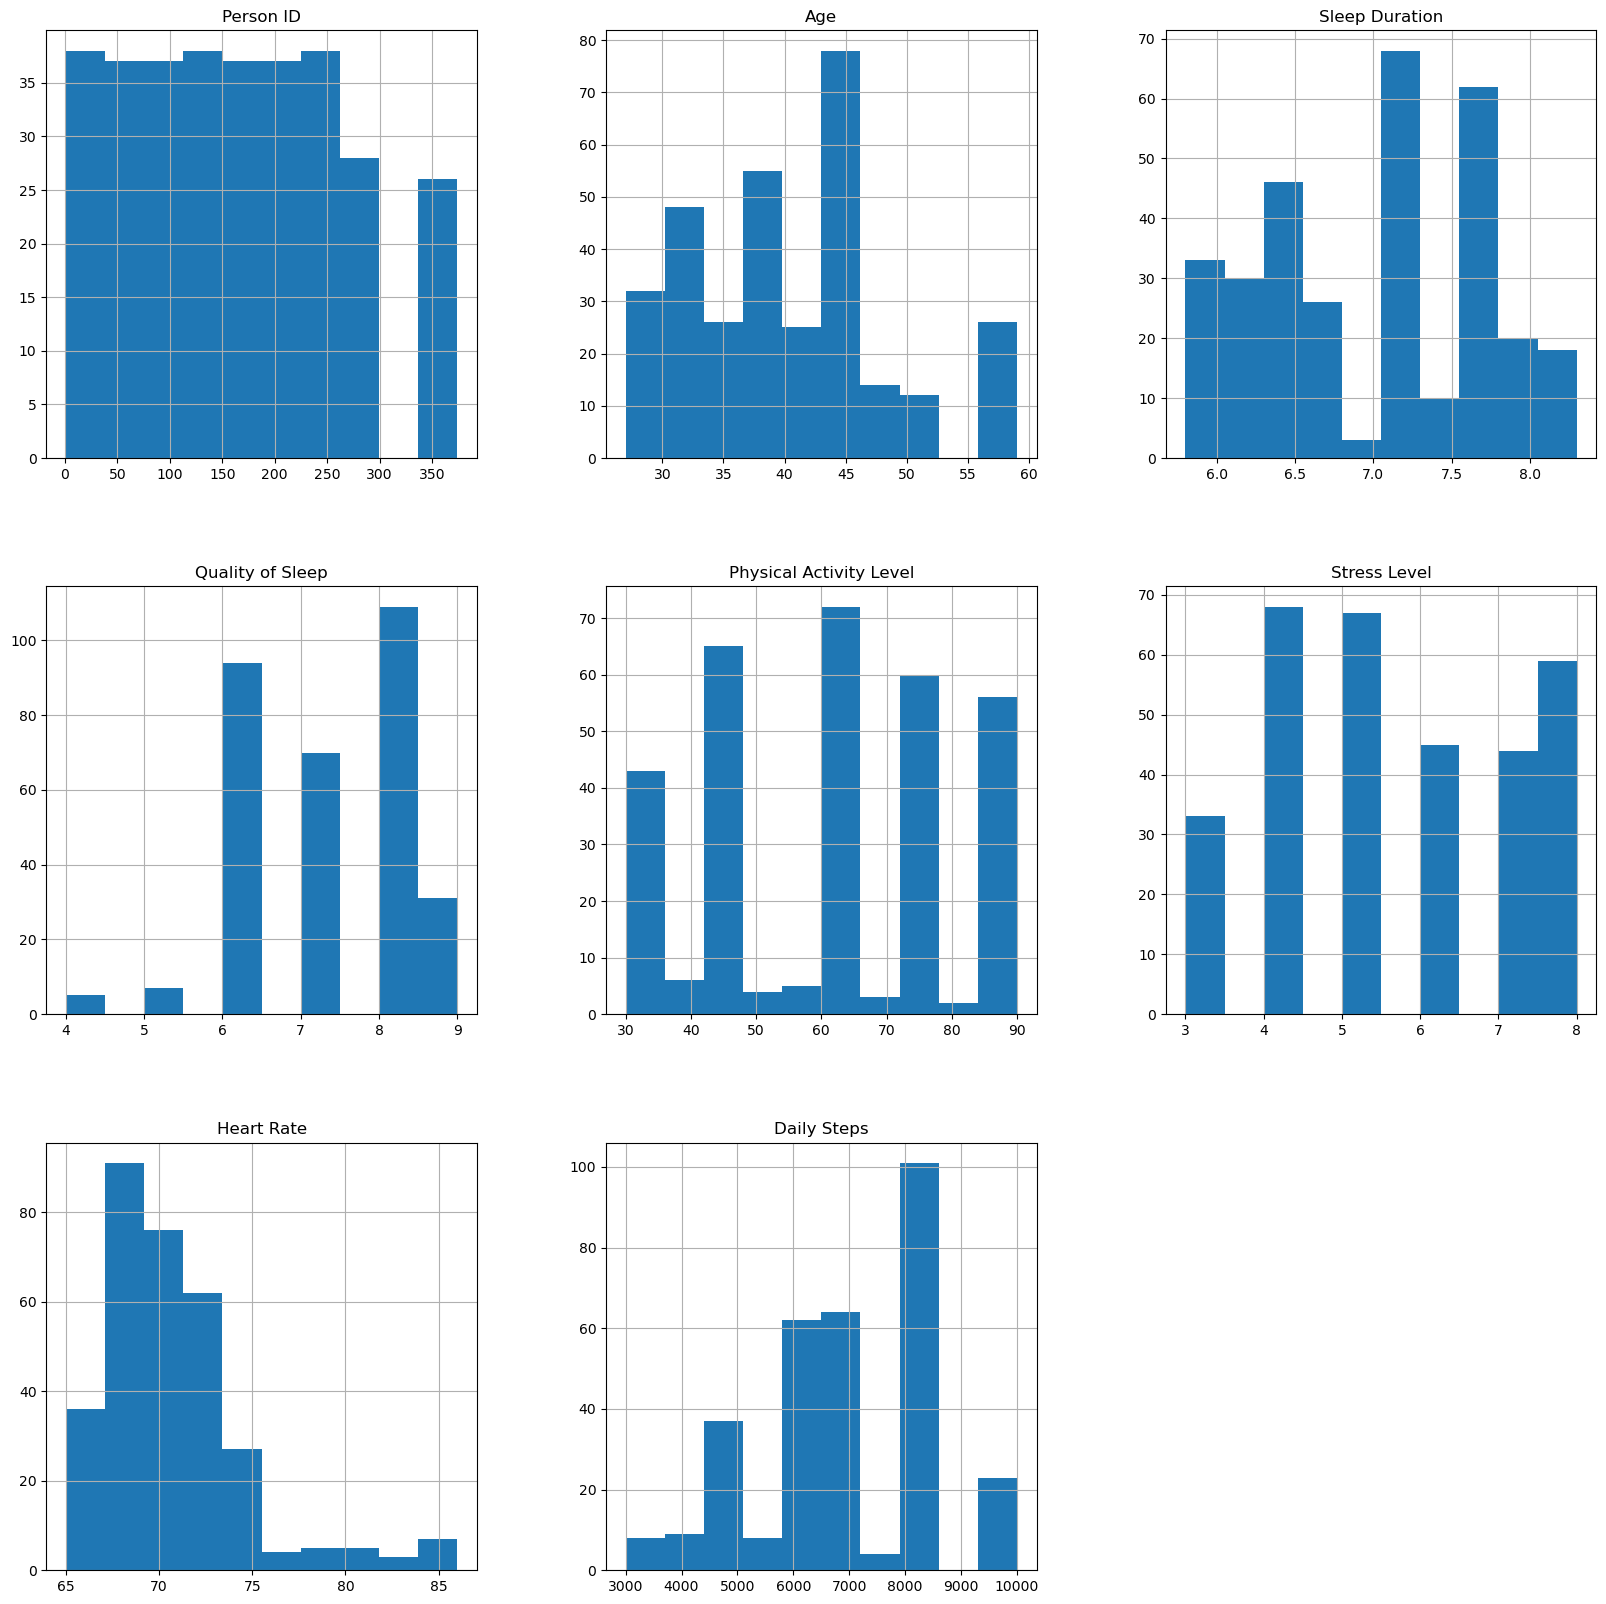

In [23]:
df.hist(figsize=(20,20))

# Encoding features

In [24]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,2,126/83,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
3,4,1,28,6,5.9,4,30,8,1,140/90,85,3000,2
4,5,1,28,6,5.9,4,30,8,1,140/90,85,3000,2


In [25]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})
df['BloodPressure_Upper_Value'] = df['BloodPressure_Upper_Value'].astype(float)
df['BloodPressure_Lower_Value'] = df['BloodPressure_Lower_Value'].astype(float)

In [26]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,1,27,9,6.1,6,42,6,2,77,4200,1,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,4,1,28,6,5.9,4,30,8,1,85,3000,2,140.0,90.0
4,5,1,28,6,5.9,4,30,8,1,85,3000,2,140.0,90.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Person ID                  316 non-null    int64  
 1   Gender                     316 non-null    int32  
 2   Age                        316 non-null    int64  
 3   Occupation                 316 non-null    int32  
 4   Sleep Duration             316 non-null    float64
 5   Quality of Sleep           316 non-null    int64  
 6   Physical Activity Level    316 non-null    int64  
 7   Stress Level               316 non-null    int64  
 8   BMI Category               316 non-null    int32  
 9   Heart Rate                 316 non-null    int64  
 10  Daily Steps                316 non-null    int64  
 11  Sleep Disorder             316 non-null    int32  
 12  BloodPressure_Upper_Value  316 non-null    float64
 13  BloodPressure_Lower_Value  316 non-null    float64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'Person ID'),
  Text(2, 0, 'Gender'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'Occupation'),
  Text(5, 0, 'Sleep Duration'),
  Text(6, 0, 'Quality of Sleep'),
  Text(7, 0, 'Physical Activity Level'),
  Text(8, 0, 'Stress Level'),
  Text(9, 0, 'BMI Category'),
  Text(10, 0, 'Heart Rate'),
  Text(11, 0, 'Daily Steps'),
  Text(12, 0, 'Sleep Disorder'),
  Text(13, 0, 'BloodPressure_Upper_Value'),
  Text(14, 0, 'BloodPressure_Lower_Value')])

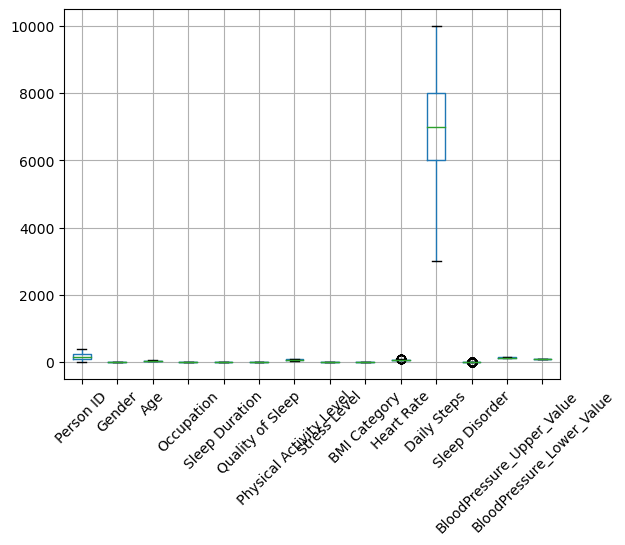

In [28]:
df.boxplot()
plt.xticks(rotation=45)

(array([1]), [Text(1, 0, 'Heart Rate')])

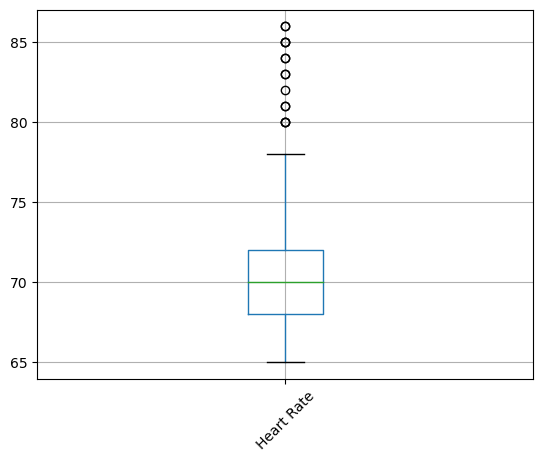

In [29]:
df.boxplot('Heart Rate')
plt.xticks(rotation=45)

# Remove outliers

In [30]:
col = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Heart Rate', 'Daily Steps', 'BloodPressure_Upper_Value', 'BloodPressure_Lower_Value','Occupation']

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).any(axis=1)]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'Person ID'),
  Text(2, 0, 'Gender'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'Occupation'),
  Text(5, 0, 'Sleep Duration'),
  Text(6, 0, 'Quality of Sleep'),
  Text(7, 0, 'Physical Activity Level'),
  Text(8, 0, 'Stress Level'),
  Text(9, 0, 'BMI Category'),
  Text(10, 0, 'Heart Rate'),
  Text(11, 0, 'Daily Steps'),
  Text(12, 0, 'Sleep Disorder'),
  Text(13, 0, 'BloodPressure_Upper_Value'),
  Text(14, 0, 'BloodPressure_Lower_Value')])

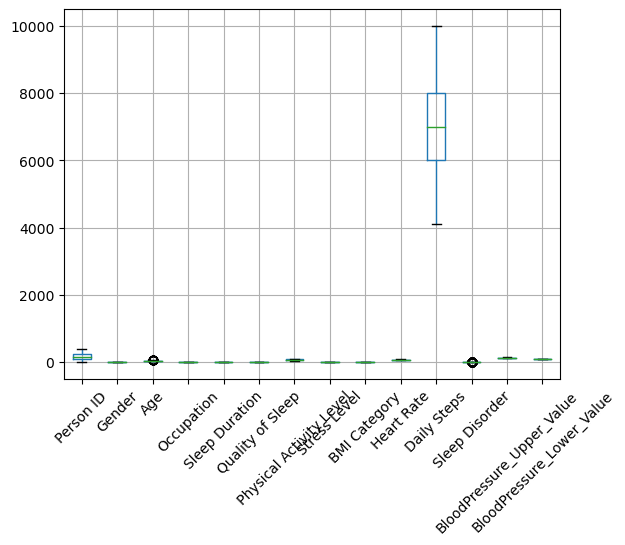

In [31]:
df.boxplot()
plt.xticks(rotation=45)

(array([1]), [Text(1, 0, 'Heart Rate')])

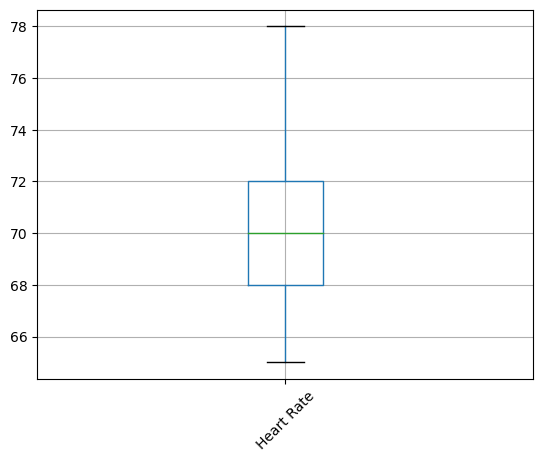

In [32]:
df.boxplot('Heart Rate')
plt.xticks(rotation=45)

#  No Null Value

In [33]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder               0
BloodPressure_Upper_Value    0
BloodPressure_Lower_Value    0
dtype: int64

# Drop Duplicates

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df["Sleep Disorder"].value_counts()

1    185
0     64
2     52
Name: Sleep Disorder, dtype: int64

array([[<AxesSubplot:title={'center':'Sleep Disorder'}>]], dtype=object)

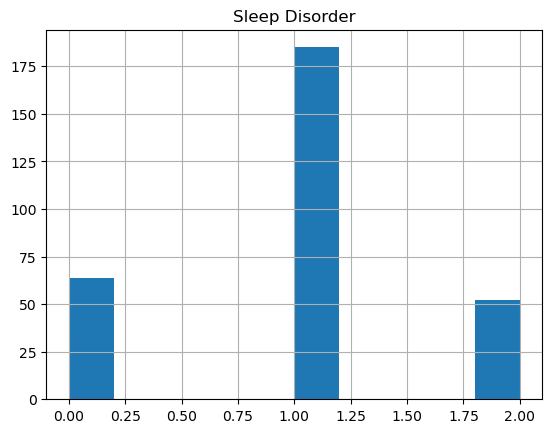

In [36]:
df.hist('Sleep Disorder')

<AxesSubplot:ylabel='Sleep Disorder'>

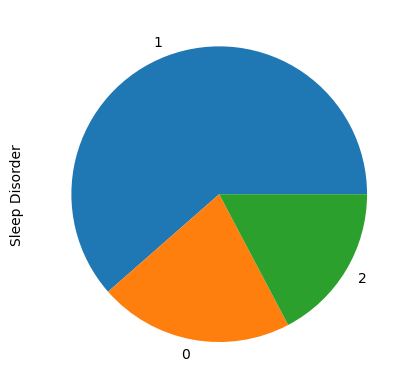

In [37]:
df['Sleep Disorder'].value_counts().plot.pie()

In [38]:
dfm= df.drop(columns=['Person ID'])

# oversampling

In [39]:
x = dfm.drop(columns=['Sleep Disorder'])
y = dfm['Sleep Disorder']

In [40]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,1,27,9,6.1,6,42,6,2,77,4200,1,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
7,8,1,29,1,7.8,7,75,6,0,70,8000,1,120.0,80.0
8,9,1,29,1,7.8,7,75,6,0,70,8000,1,120.0,80.0


In [41]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
print("after oversampling:", Counter(y_resampled))

after oversampling: Counter({1: 185, 2: 185, 0: 185})


In [42]:
x_resampled

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,27,9,6.100000,6,42,6,2,77,4200,126.0,83.0
1,1,28,1,6.200000,6,60,8,0,75,10000,125.0,80.0
2,1,28,1,6.200000,6,60,8,0,75,10000,125.0,80.0
3,1,29,1,7.800000,7,75,6,0,70,8000,120.0,80.0
4,1,29,1,7.800000,7,75,6,0,70,8000,120.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...
550,0,59,5,8.200000,9,75,3,2,68,7000,140.0,95.0
551,0,50,5,6.085992,6,90,8,2,75,10000,140.0,95.0
552,0,58,5,8.000000,9,75,3,2,68,7000,140.0,95.0
553,0,59,5,8.100000,9,75,3,2,68,7000,140.0,95.0


# Nolmalization

In [43]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x_resampled)

In [44]:
y=y_resampled

# Split Dataset

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print("x_train  :",x_train.shape)
print("y_train  :",y_train.shape)
print("x_test   :",x_test.shape)
print("y_test   :",y_test.shape)

x_train  : (388, 12)
y_train  : (388,)
x_test   : (167, 12)
y_test   : (167,)


# Modeling  With RandomForestClassifier

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(x_test)
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}


# Training dataset accuracy: 

In [47]:
best_model.score(x_train,y_train)

0.9458762886597938

# Testing dataset accuracy:

In [48]:
best_model.score(x_test,y_test)

0.9221556886227545


# <span style="color: red;">Accuracy.</span>

In [49]:
train_preds = best_model.predict(x_train)
test_preds = best_model.predict(x_test)
print("Training dataset accuracy: ")
print("Accuracy : ",accuracy_score(y_train,train_preds)*100)
print()
print("Testing dataset accuracy: ")
print("Accuracy : ",accuracy_score(y_test,test_preds)*100)
print()

Training dataset accuracy: 
Accuracy :  94.58762886597938

Testing dataset accuracy: 
Accuracy :  92.21556886227546



# confusion_matrix

Confusion Matrix:
[[53  1  0]
 [ 2 54  7]
 [ 2  1 47]]


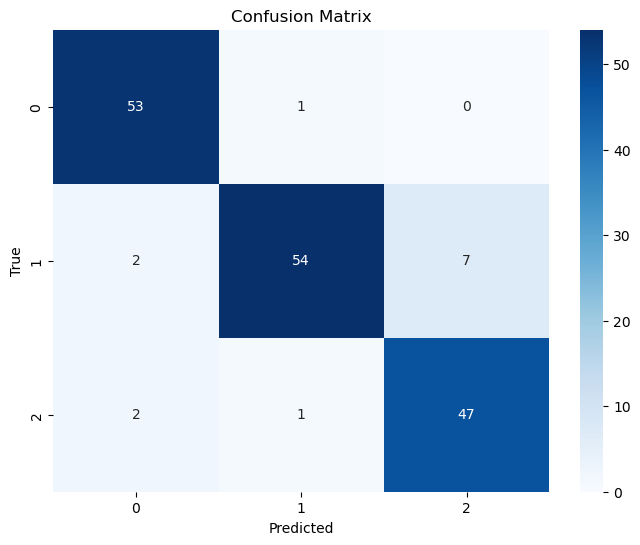

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [51]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1,
       1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0, 2,
       1, 2, 1, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0,
       0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0,
       2, 1, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 1, 2, 0, 2, 1, 0, 1, 2, 2])

# classification_report

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.96      0.86      0.91        63
           2       0.87      0.94      0.90        50

    accuracy                           0.92       167
   macro avg       0.92      0.93      0.92       167
weighted avg       0.93      0.92      0.92       167



# precision  & recall & f1_score

In [53]:
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)


In [54]:
print("precision:   ",precision*100)
print('---------------------------')
print("recall:   ",recall*100)
print('-----------------------------')
print("f1:   ",f1*100)
print("------------------------------")


precision:    [92.98245614 96.42857143 87.03703704]
---------------------------
recall:    [98.14814815 85.71428571 94.        ]
-----------------------------
f1:    [95.4954955  90.75630252 90.38461538]
------------------------------



# <span style="color: red;">ROC curves.</span>

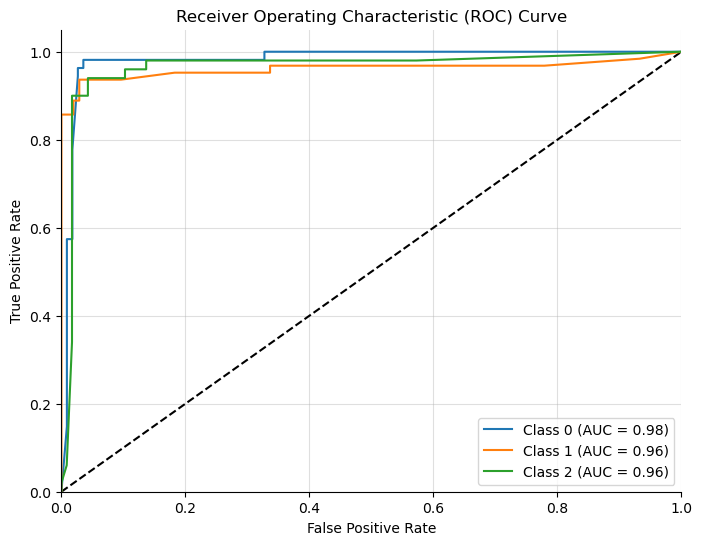

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

n_classes =3

fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred =best_model.predict_proba(x_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

figsize = (8, 6)
fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')

for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

ax.legend(loc='lower right')
ax.grid(alpha=0.4)
sns.despine()
plt.show()


#  read test_hidden 

In [56]:
dff= pd.read_csv('C:\\Users\\dell\\Documents\\sleep_health_and_lifestyle_data_test_hidden.csv')


In [57]:
dff.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,291,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000
1,292,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000
2,293,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000
3,294,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000
4,295,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000
5,296,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000
6,297,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000
7,298,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000
8,299,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000
9,300,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000


# Data Cleaning &process same training data

In [58]:
dff['BMI Category']=dff['BMI Category'].replace('Normal','Normal Weight')
dff['BMI Category'].value_counts()

Normal Weight    34
Overweight       24
Name: BMI Category, dtype: int64

In [59]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
dff['Gender'] = label_encoder.fit_transform(dff['Gender'])
dff['Occupation'] = label_encoder.fit_transform(dff['Occupation'])
dff['BMI Category'] = label_encoder.fit_transform(dff['BMI Category'])
dff.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,291,0,50,3,6.0,6,90,8,1,140/95,75,10000
1,292,0,50,3,6.1,6,90,8,1,140/95,75,10000
2,293,0,50,3,6.1,6,90,8,1,140/95,75,10000
3,294,0,50,3,6.0,6,90,8,1,140/95,75,10000
4,295,0,50,3,6.1,6,90,8,1,140/95,75,10000


In [60]:
dff = pd.concat([dff, dff['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
dff = dff.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})
dff['BloodPressure_Upper_Value'] = dff['BloodPressure_Upper_Value'].astype(float)
dff['BloodPressure_Lower_Value'] = dff['BloodPressure_Lower_Value'].astype(float)

In [61]:
dff.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,291,0,50,3,6.0,6,90,8,1,75,10000,140.0,95.0
1,292,0,50,3,6.1,6,90,8,1,75,10000,140.0,95.0


In [62]:
x= dff.drop(columns=['Person ID'])

In [63]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

# prediction

In [64]:
y_result = best_model.predict(x)
print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (58,)


In [65]:
y_result

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2])

# DataFrame prediction

In [66]:
y_result=pd.DataFrame(y_result)

In [67]:
print(y_result)

    0
0   2
1   2
2   2
3   2
4   2
5   2
6   2
7   2
8   1
9   1
10  1
11  1
12  2
13  2
14  2
15  2
16  0
17  0
18  0
19  0
20  0
21  0
22  1
23  1
24  1
25  1
26  1
27  1
28  1
29  1
30  1
31  1
32  1
33  1
34  1
35  1
36  1
37  1
38  1
39  1
40  1
41  1
42  1
43  1
44  1
45  1
46  1
47  1
48  1
49  2
50  2
51  1
52  1
53  2
54  2
55  2
56  2
57  2


# Save pred as csv

In [68]:
y_result.to_csv('New_pred_Marwa_sayed.csv',index=False)